In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("billets.csv")
data = pd.DataFrame(data, columns=data.columns)

data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


# Mission 0

In [3]:
data.shape

(170, 7)

## Nettoyage

In [4]:
data.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [5]:
data.info() # Plus propre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
is_genuine      170 non-null bool
diagonal        170 non-null float64
height_left     170 non-null float64
height_right    170 non-null float64
margin_low      170 non-null float64
margin_up       170 non-null float64
length          170 non-null float64
dtypes: bool(1), float64(6)
memory usage: 8.2 KB


<p> Des valeurs sont manquantes / Non attribuées

In [6]:
print("Les colonnes qui sont nulles :")
i = 0
while i <= 6:
    print(data.columns[i], any(pd.isnull(data.iloc[:,i])))
    i += 1

#Fonctionne aussi :
#i = 0
#while i <= 6:
#    isnull = data[pd.isnull(data.iloc[:,i])]
#    print(isnull)
#    i += 1
print("\n")
print("Les colonnes qui sont NaN :")
i = 0
while i <= 6:
    print(data.columns[i], any(pd.isna(data.iloc[:,i])))
    i += 1

Les colonnes qui sont nulles :
is_genuine False
diagonal False
height_left False
height_right False
margin_low False
margin_up False
length False


Les colonnes qui sont NaN :
is_genuine False
diagonal False
height_left False
height_right False
margin_low False
margin_up False
length False


## Analyses univariées

### Describe sur tout le Df

In [7]:
data_all = data.describe()
data_all

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


<p> On remarque que sur toutes les valeurs, seule "margin_low" et "length" possède un écart type important ; Cela nous indique que les valeurs varient fortement (plus fortement que les autres variables)</p>
<p> Voyons maintenant par type de billet - Vrai et Faux - comment se comporte les variables.</p>

### Describe sur les faux billets

In [8]:
faux = data[data.is_genuine == False].describe()
faux

,diagonal,height_left,height_right,margin_low,margin_up,length
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
std,0.297426,0.213130,0.253152,0.540846,0.185102,0.676931
min,171.380000,103.780000,103.440000,3.820000,2.980000,109.970000
25%,171.682500,104.082500,103.982500,4.952500,3.185000,111.270000
50%,171.875000,104.215000,104.170000,5.265000,3.335000,111.765000
75%,172.047500,104.377500,104.280000,5.702500,3.450000,111.985000
max,173.010000,104.720000,104.860000,6.280000,3.680000,113.640000


<p> Encore une fois les valeurs "margin_low" et "length" se démarquent dans leur écart type </p>
<p> Voyons si ces écarts types sont sont les mêmes avec les vrais billets </p>

### Describe sur les vrais billets

In [9]:
vrais = data[data.is_genuine == True].describe()
vrais

,diagonal,height_left,height_right,margin_low,margin_up,length
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200
std,0.307981,0.296251,0.292406,0.314509,0.197726,0.380476
min,171.040000,103.230000,103.140000,3.540000,2.270000,111.760000
25%,171.790000,103.740000,103.557500,3.900000,2.937500,112.995000
50%,172.005000,103.915000,103.760000,4.080000,3.070000,113.210000
75%,172.162500,104.145000,103.972500,4.382500,3.192500,113.505000
max,172.750000,104.860000,104.950000,5.040000,3.530000,113.980000


<p> Les minimums et maximums des valeurs True et False correspondent bien, nous ne pouvons rien déduire directement <br/>
(Si le maximum d'un True est inférieur au minimum d'un False alors nous cela aurait pu nous aider) </p>

<p> Cependant on remarque que cette fois, les écarts types des variables "margin_low" et "length" ne sont pas très éloignés des autres variables. Il semblerait donc que les faux billets se démarquent par une forte variances en margin_low et length </p>

<p> Il ne semble pas y avoir de valeur aberrantes de première abord ; Voyons avec des Histogrammes. </p>

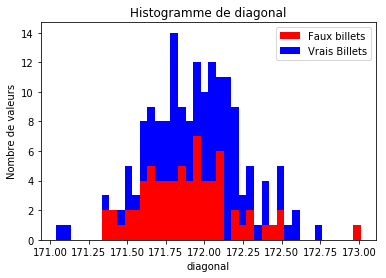

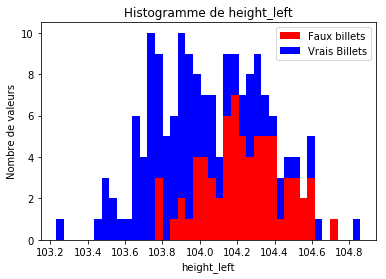

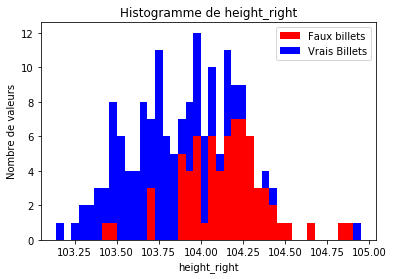

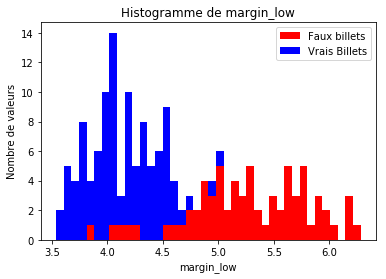

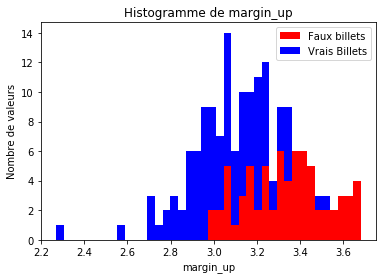

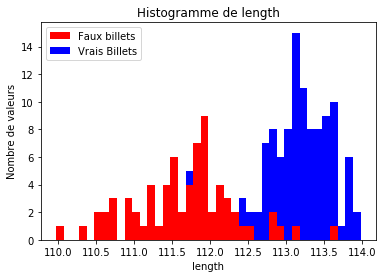

In [10]:
#Plus très utile maintenant qu'on a le pairplot de seaborn
i = 1
while i <= 6:
    plt.hist([data.iloc[:,i][data.is_genuine == False], data.iloc[:,i][data.is_genuine == True]], 
             bins=(40), color = ["r", "b"],
             label=["Faux billets", "Vrais Billets"],
            histtype = 'barstacked')
    plt.title("Histogramme de {}".format(data.columns[i]))
    plt.xlabel(data.columns[i])
    plt.ylabel("Nombre de valeurs")
    plt.legend(loc="best")
    plt.show()
    i += 1

<p> Les colonnes Margin_low et Length se démarquent par leurs grandes différences entre les vrais et faux billets. </p>
<p> Si l'on décidait de se baser uniquement sur ces histogrammes pour détecter si un billet est vrai ou non, alors le programme ne serait pas satisfaisant ; <br/>
    En effet on peut voir que certains faux billets ont la même taille (en margin_low ou length) que les vrais billets, et inversement. Nous passerions donc à côté de faux billets. </p>

C:\Users\jpaul\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


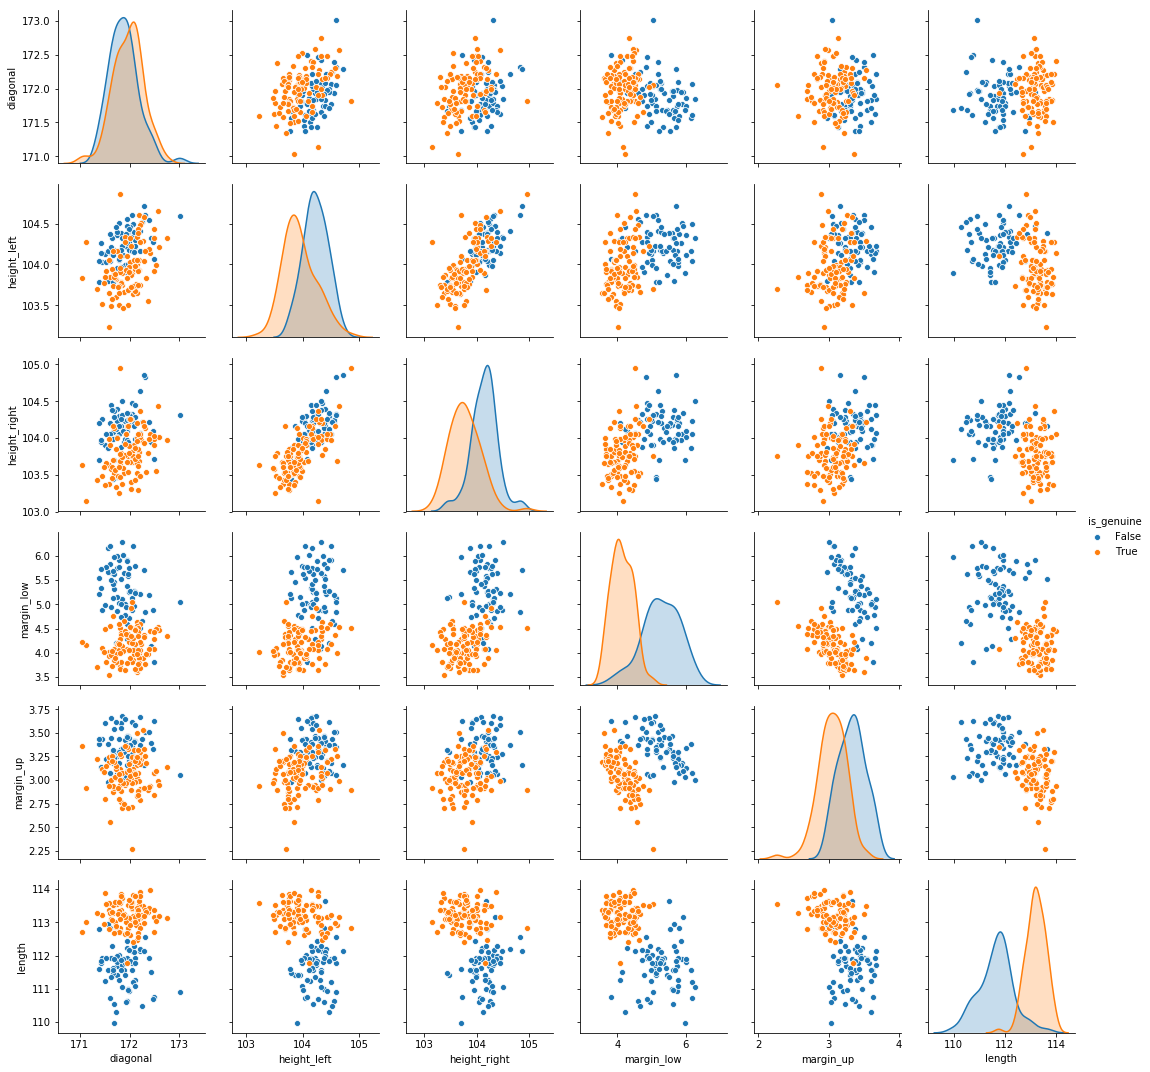

In [11]:
sns.pairplot(data, hue="is_genuine", vars=data.iloc[:,1:])
plt.show()

On obtient les mêmes résultats sur ces graphs que sur ceux d'avant. <br/>
Je supprimerai ceux d'avant après avoir un peu plus avancé sur le projet

<p> On voit qu'il y a des extrêmes pour les valeurs dont nous parlions tout à l'heure (margin_low et length), voyons maintenant si les extrêmes de l'une des valeurs correspondent aux extrêmes de l'autre. </p>

### les outliners

In [12]:
max_margin = data[data['is_genuine'] == True]['margin_low'].max()
max_length = data[data['is_genuine'] == True]['length'].max()

outliners = data[data["is_genuine"] == False]
outliners = outliners[outliners["margin_low"] > max_margin]
outliners = outliners[outliners['length'] > max_length]
print(outliners)

Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []


<p> Les valeurs au dessus de margin_low.max (pour les vrais billets) ne correspondent pas aux valeurs au dessus de length.max (pour les vrais billets ; Nos outliners prennent donc des valeurs indépendantes pour chaque variables </p>

# Partie 1 : ACP

In [13]:
from functions2 import *
from sklearn import preprocessing, decomposition

## Composantes principales

In [14]:
n_comp = 5

data_pca = data[["diagonal", "height_left", 
                 "height_right", "margin_low", 
                 "margin_up", "length"]]

data_pca = data_pca.fillna(data_pca.mean())

#On ne prend que les valeurs
X = data_pca.values

#La variable qui nous permettra de colorer nos résultats : 
fakeornot = [data.loc[fake, "is_genuine"] for fake in data.index]

names = data_pca.index

features = data_pca.columns

#Centrage et réduction : 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#Calcul des composantes principales : 
pca = decomposition.PCA(n_components = n_comp)
pca = pca.fit(X_scaled)

## Eboulis des valeurs propres

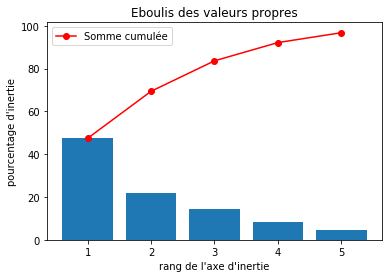

In [15]:
display_scree_plot(pca)

<p> L'éboulie des valeurs propres nous indique que 5 composantes principales sont nécessaires pour expliquer presque 100% des données. </p>

<p> Nous apprenons aussi que la composante principale 1 (PC1) explique 47,4 % des informations.</p>

<p>Notons aussi qu'un plan factoriel (F) correspond à la projection d'une composante principale (PC) sur un axe. <br/>
F1 correspond donc à la projection de PC1, F2 à la projection de PC2, ect...</p>

## Cercle des corrélations

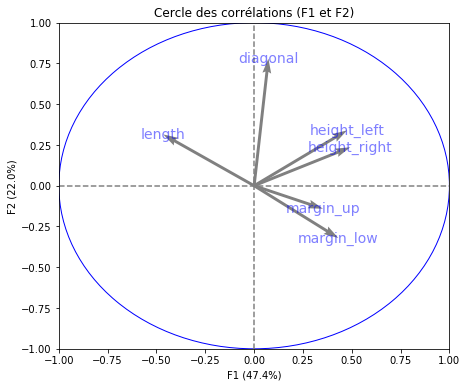

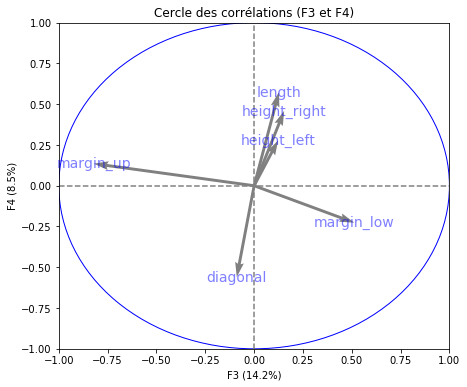

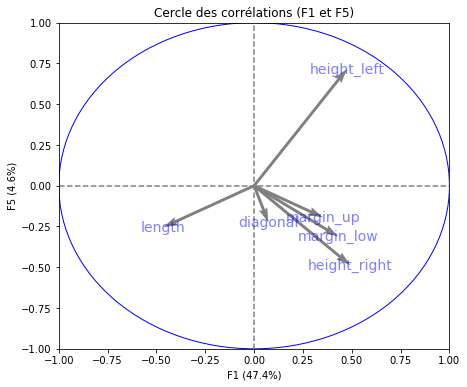

In [16]:
pcs = pca.components_
display_circles("Cercle_des_correlations", pcs, n_comp, pca, [(0,1),(2,3),(0,4)], labels = np.array(features))

<p> Le cercle des corrélations indique que height_left, height_right, margin_up, margin_low, et length sont corrélées pour F1. </p>

<p> Afin de vérifier cela par les chiffres, regardons le poids de chaque variable sur l'inertie de l'axe :</p>

## Poids des variables 

In [17]:
poids_des_variables = pd.DataFrame(pcs, index=[["F1", "F2", "F3", "F4", "F5"]], 
                                   columns = features)

pds = poids_des_variables

#On transpose la matrice (utile pour plus tard dans le programme)
pds = pds.T
#On ne prend que F1 et F2 (qui nous intéressent)
pds = pds.iloc[:,:2]
pds

,F1,F2
diagonal,0.073275,0.779639
height_left,0.475502,0.339250
height_right,0.491821,0.235543
margin_low,0.431027,-0.320537
margin_up,0.352540,-0.141120
length,-0.465373,0.314536


<p> On retrouve bien ici nos colonnes vues précédemment pour F1. </p>

## Projection des individus

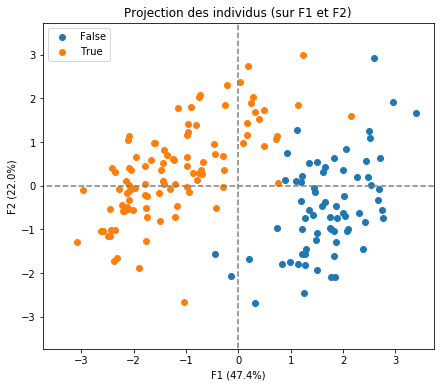

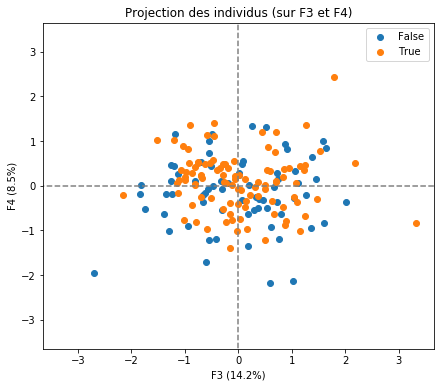

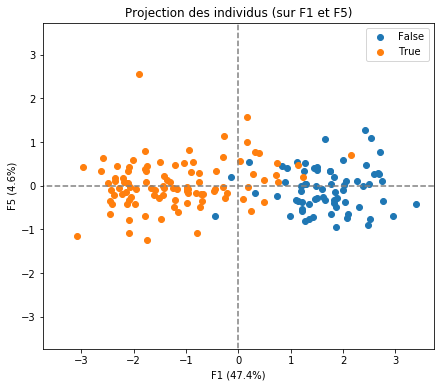

In [18]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(0,4)]
                         , illustrative_var = fakeornot)

<p> La projection des individus sur F1 et F2 nous indique deux clusters, les vrais billets, ainsi que les faux. Il semble donc que nous allons pouvoir nous servir de F1 et F2 pour notre programme. (Attention toutefois certains points du Cluster 'Faux' se démarque peu ou pas du cluster 'Vrai', et inversement - Il faudra donc retravailler ce point pour une plus grande précision du programme).</p>   

<p> Pour la grande majorité des points, un billet faux correspond donc à une grande valeur pour F1, et une faible valeur pour un billet vrai </p>

<p> Les autres plans factoriels n'apportent pas d'informations supplémentaires utiles pour notre programme </p>

## Contribution des individus dans l'inertie totale : 

In [19]:
#contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
contrib = pd.DataFrame({'is_genuine':data["is_genuine"],'d_i':di})
contrib.sort_values(by="d_i", ascending = False).head()

,is_genuine,d_i
166,False,20.625650
0,True,18.410598
4,True,18.039567
122,False,16.790944
39,True,15.052608


On a ici les individus ayant le plus de poids dans l'inertie totale ; A voir comment ça peut servir.

## Construction de l'échantillon avec les données de l'ACP

In [20]:
factorial = pd.DataFrame(X_projected, index=names, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
data2 = data["is_genuine"]
data2 = pd.DataFrame(data2, index=names, columns=['is_genuine'])
data2 = pd.merge(data2, factorial,  left_index = True, right_index = True, how = "left")
data2.head()

,is_genuine,PC1,PC2,PC3,PC4,PC5
0,True,2.153639,1.599709,1.787451,2.433465,0.699690
1,True,-2.110416,-0.526039,0.542563,0.344550,0.067440
2,True,-1.973152,-0.048102,0.858716,0.374812,-0.424886
3,True,-2.059795,-0.089105,-0.531529,0.519548,-0.033267
4,True,-2.403180,0.412170,3.319507,-0.837043,-0.420151


## Qualité de la représentation 

In [21]:
# Point à voir quand plus d'info

# Mission 2 : Appliquer un algorithme de Classification

In [22]:
from sklearn.cluster import KMeans

## Algorithme k-means

In [23]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data2.iloc[:,1:])

kmeans = pd.DataFrame(kmeans.labels_, index = data.index, columns=["Clusters"])

In [24]:
data2 = pd.merge(data2, kmeans, left_index=True, right_index=True)
data2.head()

,is_genuine,PC1,PC2,PC3,PC4,PC5,Clusters
0,True,2.153639,1.599709,1.787451,2.433465,0.699690,1
1,True,-2.110416,-0.526039,0.542563,0.344550,0.067440,0
2,True,-1.973152,-0.048102,0.858716,0.374812,-0.424886,0
3,True,-2.059795,-0.089105,-0.531529,0.519548,-0.033267,0
4,True,-2.403180,0.412170,3.319507,-0.837043,-0.420151,0


## Visualisation sur F1

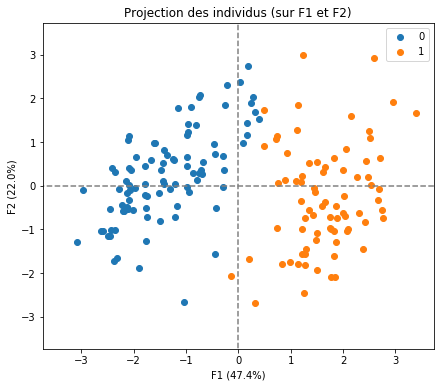

In [25]:
clust = [data2.loc[i, "Clusters"] for i in data.index]
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = clust)

<p> Nos deux clusters rejoignent presque intégralement les valeurs vrai/faux que nous avions vu avant </p>


In [26]:
# Faire un dendrogramme pour comparer
#scipy stats pour regression aussi ça peut marcher

#  Mission 3 : Mise en place du Programme

In [27]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Préparation du Df

In [28]:
#On transforme la colonne is_genuine en 1 et 0 ; 1 = True, 0=False.
data2['is_genuine'] = list(map(int, data['is_genuine'])) 

## Régression

In [29]:
reg_log1 = smf.glm('is_genuine~PC1+PC2',
                   data=data2,
                   family=sm.families.Binomial()).fit()
print(reg_log1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                            GLM   Df Residuals:                      167
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.4421
Date:                Thu, 16 May 2019   Deviance:                       18.884
Time:                        13:08:25   Pearson chi2:                     31.5
No. Iterations:                     9   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3667      0.976      2.425      0.015       0.454       4.279
PC1           -4.5152      1.249     -3.616      0.0

<p> On obtient une p_valeur inférieur à 5% avec PC1 et PC2 ; La p_valeur de PC3 dépasse notre seuil de 5%, le paramètre n'est donc pas significativement différent de 0. </p>

<p> Nous utiliserons donc PC1 et PC2 pour cette régression logistique. (C'est d'ailleurs ce que laissait entendre l'ACP).</p>

## Définition du Programme

<p> Pour le programme : <br/>
    <li><ol>Import du fichier de base, parcourt des différentes colonnes (en vérifiant que les colonnes correspondent bien à celles de notre fichier train)</ol>
        <ol>Vérifications valeurs manquantes </ol>
        <ol>Centrage et réduction des données </ol>
        <ol>Transformation des données en valeurs PC1 et PC2 </ol>
        <ol>Passage dans le .predict de notre régression logistique </ol>
        <ol>Voir comment est le fichier de sortie, surement un traitement des données à faire ensuite </ol></li>

In [71]:
def billets (df):
    #On récupère les noms de colonnes :
    columns_df = list(df.columns)
    columns_data = list(data[['diagonal','height_left', 
                          'height_right','margin_low', 
                          'margin_up','length']].columns)
    
    #On les compare avec celles de notre fichier de train
    result =  all(elem in columns_df  for elem in columns_data)
    try:
        result = True
    except:
        result = False
        print("Les données fournies ne contiennent pas les colonnes requises.")
        print("Pour que le programme fonctionne, il faut les colonnes suivantes :")
        print(columns_data)
    
    #On gère les valeurs manquantes :
    df = df.fillna(df.mean()) 
    
    #On prend les colonnes utiles pour le centrage/réduction : 
    df_cr = df[["diagonal", "height_left", 
                 "height_right", "margin_low", 
                 "margin_up", "length"]]
    
    #On centre et on réduit : 
    from sklearn import preprocessing, decomposition
    df_value = df_cr.values
    df_std_scale = preprocessing.StandardScaler().fit(df_value)
    df_scaled = df_std_scale.transform(df_value)
    
    #On applique maintenant le poids de chaque variable 
    #à la variable elle même
    #Pour obtenir ses coordonnées dans F1 et F2 :
    df_scaled = df_scaled.dot(pds)
    df_facto = pd.DataFrame(df_scaled, index=df["id"], 
                      columns=[["PC1", "PC2"]])
    
    #On applique la prédiction de la régression logistique : 
    df_predict = reg_log1.predict(df_facto)
    
    #On modifie le df retourné pour avoir l'identifiant, la proba et True or False :
    df_predict = pd.DataFrame(df_predict, index=df["id"], columns=["Proba"])
    df_predict["is_genuine"] = np.where(df_predict["Proba"] >= 0.50, True, False)
    
    #On print le tout pour l'avoir en sortie de programme :
    print(df_predict)
    
    #On enregistre le fichier dans un répertoire :
    #df_final.to_csv("previsions.csv")
    
    #On calcule le nombre de True et de False : 
    true = df_predict[df_predict["is_genuine"] == True].count()
    false = df_predict[df_predict["is_genuine"] == False].count()
    
    #On print le tout : 
    print("\n")
    print("Le nombre de True est de : ", true[1])
    print("Le nombre de False est de : ", false[1])
    
    #On save le fichier avec les True uniquement : 
    vrais_billets = df_predict[df_predict["is_genuine"] == True]
    #vrais_billets.to_csv("vrais_billets.csv")

### Points à faire :

<p> Gestion des exceptions au début de programme (n'affiche pas le print)</p>

<p>Revoir le point sur la prévision (taux de faux positifs et vrais négatifs élevés) </p>

<p> Utilisation de k-means sur le df test ? </p>

# Etapes du programmes :

### Vérification des colonnes :

In [63]:
#On crée deux variables contenant les listes de nos colonnes :
columns_data = list(data[['diagonal','height_left', 
                          'height_right','margin_low', 
                          'margin_up','length']].columns)
columns_df = list(data2.columns) + list(data.columns) #On test ici avec une liste 
                                                        #contenant plus de variables

#On crée result qui cherche si toutes les colonnes data sont bien dans les colonnes df
result =  all(elem in columns_df for elem in columns_data)
if result:#Result est booléen, si true alors :
    print("Yes, columns_df contains all elements of columns_data") 
else : #Si False alors :
    print("No, columns_df does not contains all elements of columns_data")

Yes, columns_df contains all elements of columns_data


### Transformation des colonnes en F1, F2

In [42]:
#Pour le test ici nous utiliserons des individus lambda :
df = data.iloc[1:6,1:7]
df_cr = df[["diagonal", "height_left", 
                 "height_right", "margin_low", 
                 "margin_up", "length"]]

#On centre et on réduit (point fait avant dans le programme)
df_value = df_cr.values
df_std_scale = preprocessing.StandardScaler().fit(df_value)
df_scaled = df_std_scale.transform(df_value)

#On applique maintenant un produit matriciel sur notre df centré/réduit
df_scaled = df_scaled.dot(pds)

#On le transforme en df à nouveau avec le bon nom de colonnes 
df_facto = pd.DataFrame(df_scaled, index=df.index, columns=[["PC1", "PC2"]])
df_facto

,PC1,PC2
1,-0.460418,-1.121705
2,-0.965815,-0.231346
3,-1.080430,-0.286105
4,-0.577581,-0.291988
5,3.084243,1.931144


# Test 

In [65]:
#Test avec le fichier examples : 
test = pd.read_csv("example.csv")
test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [72]:
billets(test)

        Proba  is_genuine
id                       
A_1  0.153510       False
A_2  0.007134       False
A_3  0.003420       False
A_4  0.999978        True
A_5  0.999999        True


Le nombre de True est de :  2
Le nombre de False est de :  3
